In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os


print(tf.__version__)   # Tensorflow의 버전을 출력

mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(len(x_train))  # x_train 배열의 크기를 출력

2.15.0
11490434/11490434 [==============================] - 1s 0us/step
60000


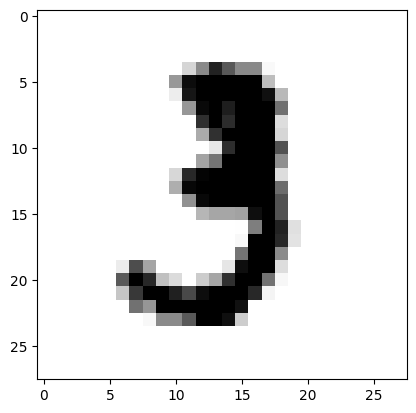

In [ ]:
plt.imshow(x_train[10], cmap=plt.cm.binary)
plt.show()

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값: ', np.min(x_train_norm), '최대값 : ', np.max(x_train_norm))

최소값:  0.0 최대값 :  1.0


In [ ]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수 : ', len(model.layers))

Model에 추가된 Layer 개수 :  7


In [ ]:
print("Before Reshape - x_train_norm shape : {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape : {}".format(x_test_norm.shape))

x_train_reshaped = x_train_norm.reshape( -1, 28, 28, 1)
x_test_reshaped = x_test_norm.reshape( -1, 28, 28, 1)
# 데이터 개수에 -1을 쓰면 reshape시 자동 계산이 된다.

print("After Reshape - x_train_reshaped shape : {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape : {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape : (60000, 28, 28)
Before Reshape - x_test_norm shape : (10000, 28, 28)
After Reshape - x_train_reshaped shape : (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape : (10000, 28, 28, 1)


In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0123 - accuracy: 0.9955
Epoch 2/20
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0097 - accuracy: 0.9969
Epoch 3/20
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0075 - accuracy: 0.9977
Epoch 4/20
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0083 - accuracy: 0.9970
Epoch 5/20
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0068 - accuracy: 0.9978
Epoch 6/20
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0060 - accuracy: 0.9983
Epoch 7/20
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0053 - accuracy: 0.9981
Epoch 8/20
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0064 - accuracy: 0.9980
Epoch 9/20
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0057 - accuracy: 0.9980
Epoch 10/20
1875/1875 [==============================] - 30s 16m

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

313/313 - 3s - loss: 0.0503 - accuracy: 0.9896 - 3s/epoch - 8ms/step
test_loss : 0.050348542630672455
test_accuracy : 0.9896000027656555


In [ ]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

313/313 - 3s - loss: 0.0422 - accuracy: 0.9869 - 3s/epoch - 8ms/step
test_loss : 0.04220985993742943
test_accuracy : 0.9868999719619751


In [ ]:
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("/content/keras_model.h5", compile=False)

# Load the labels
class_names = open("/content/labels.txt", "r").readlines()

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
image = Image.open("/content/0.jpg").convert("RGB")

# resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

# turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Load the image into the array
data[0] = normalized_image_array

# Predicts the model
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# Print prediction and confidence score
print("Class:", class_name[2:], end="")
print("Confidence Score:", confidence_score)


1/1 [==============================] - 1s 912ms/step
Class: paper
Confidence Score: 0.99999666


In [ ]:
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("/content/keras_model.h5", compile=False)

# Load the labels
class_names = open("/content/labels.txt", "r").readlines()

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
image = Image.open("/content/3.jpg").convert("RGB")

# resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

# turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Load the image into the array
data[0] = normalized_image_array

# Predicts the model
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# Print prediction and confidence score
print("Class:", class_name[2:], end="")
print("Confidence Score:", confidence_score)


1/1 [==============================] - 1s 908ms/step
Class: paper
Confidence Score: 0.9378835


In [ ]:
from keras.models import load_model  # TensorFlow is required for Keras to work
import cv2  # Install opencv-python
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("/content/keras_model.h5", compile=False)

# Load the labels
class_names = open("/content/labels.txt", "r").readlines()

# CAMERA can be 0 or 1 based on default camera of your computer
camera = cv2.VideoCapture(0)

while True:
    # Grab the webcamera's image.
    ret, image = camera.read()

    print(image.shape)
    camera.release() # rele


    # Resize the raw image into (224-height,224-width) pixels
    image = cv2.resize(image, (224, 224), interpolation=cv2.INTER_AREA)

    # Show the image in a window
    cv2.imshow("Webcam Image", image)

    # Make the image a numpy array and reshape it to the models input shape.
    image = np.asarray(image, dtype=np.float32).reshape(1, 224, 224, 3)

    # Normalize the image array
    image = (image / 127.5) - 1

    # Predicts the model
    prediction = model.predict(image)
    index = np.argmax(prediction)
    class_name = class_names[index]
    confidence_score = prediction[0][index]

    # Print prediction and confidence score
    print("Class:", class_name[2:], end="")
    print("Confidence Score:", str(np.round(confidence_score * 100))[:-2], "%")

    # Listen to the keyboard for presses.
    keyboard_input = cv2.waitKey(1)

    # 27 is the ASCII for the esc key on your keyboard.
    if keyboard_input == 27:
        break

camera.release()
cv2.destroyAllWindows()


AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
from PIL import Image
import glob

# /content/rock
def resize_images(img_path):
	images=glob.glob("/content/"+img_path + "/*.jpg")

	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")

	print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

255  images to be resized.


<ipython-input-1-91559aa8f0ba>:14: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


255  images resized.
가위 이미지 resize 완료!


In [ ]:
image_dir_path = "rock"
resize_images(image_dir_path)

image_dir_path = "paper"
resize_images(image_dir_path)

219  images to be resized.


<ipython-input-1-91559aa8f0ba>:14: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


219  images resized.
224  images to be resized.
224  images resized.


In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt

def load_data(img_path, number_of_data=698):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1

    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "/content/r_s_p" #폴더명
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))


학습데이터(x_train)의 이미지 개수는 698 입니다.
x_train shape: (698, 28, 28, 3)
y_train shape: (698,)


라벨 :  0


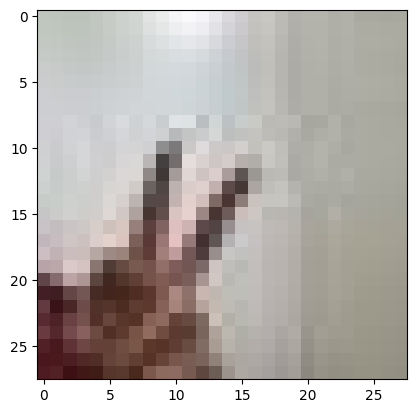

In [ ]:
plt.imshow(x_train[0])
print('라벨 : ', y_train[0])

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

Epoch 1/10
22/22 [==============================] - 2s 26ms/step - loss: 1.2191 - accuracy: 0.4971
Epoch 2/10
22/22 [==============================] - 1s 27ms/step - loss: 0.6521 - accuracy: 0.7407
Epoch 3/10
22/22 [==============================] - 1s 26ms/step - loss: 0.3286 - accuracy: 0.9169
Epoch 4/10
22/22 [==============================] - 1s 26ms/step - loss: 0.1697 - accuracy: 0.9556
Epoch 5/10
22/22 [==============================] - 1s 26ms/step - loss: 0.0863 - accuracy: 0.9814
Epoch 6/10
22/22 [==============================] - 1s 26ms/step - loss: 0.0487 - accuracy: 0.9943
Epoch 7/10
22/22 [==============================] - 1s 25ms/step - loss: 0.0280 - accuracy: 0.9986
Epoch 8/10
22/22 [==============================] - 1s 25ms/step - loss: 0.0199 - accuracy: 0.9971
Epoch 9/10
22/22 [==============================] - 1s 27ms/step - loss: 0.0112 - accuracy: 0.9986
Epoch 10/10
22/22 [==============================] - 1s 26ms/step - loss: 0.0063 - accuracy: 1.0000


In [ ]:
image_dir_path = "content/r_s_p/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0

print("x_test shape : {}".format(x_test.shape))
print("y_test shape : {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 0 입니다.
x_test shape : (698, 28, 28, 3)
y_test shape : (698,)


In [ ]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

In [ ]:
predicted_result = model.predict(x_test_norm)	# model이 추론한 확률값
predicted_labels = np.argmax(predicted_result, axis=1)

idx=600		# 값을 변경해서 찾아보자
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

In [ ]:
plt.imshow(x_test[idx], cmap=plt.cm.binary)
plt.show()

In [ ]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

# Use the function
from keras.models import load_model
import cv2
import numpy as np

# Load the model and labels
model = load_model("/content/keras_model.h5", compile=False)
class_names = open("/content/labels.txt", "r").readlines()

# Capture a photo
filename = take_photo()

# Load the photo
image = cv2.imread(filename)

# Preprocess the image
image = cv2.resize(image, (224, 224), interpolation=cv2.INTER_AREA)
image = np.asarray(image, dtype=np.float32).reshape(1, 224, 224, 3)
image = (image / 127.5) - 1

# Make a prediction
prediction = model.predict(image)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# Print the result
print(f"Class: {class_name[2:].strip()}\nConfidence Score: {np.round(confidence_score * 100, 2)}%")


<IPython.core.display.Javascript object>

1/1 [==============================] - 1s 947ms/step
Class: scissor
Confidence Score: 97.62%


In [ ]:
from keras.models import load_model
import cv2
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("/content/keras_model.h5", compile=False)

# Load the labels
class_names = open("/content/labels.txt", "r").readlines()

# Load the video file (replace 'path_to_your_video.mp4' with your video file path)
video_path = "/content/path_to_your_video.mp4"
video = cv2.VideoCapture(video_path)

while video.isOpened():
    ret, frame = video.read()

    # If there's a frame to process
    if ret:
        # Resize the raw frame into (224-height,224-width) pixels
        resized_frame = cv2.resize(frame, (224, 224), interpolation=cv2.INTER_AREA)

        # Make the frame a numpy array and reshape it to the model's input shape.
        image_array = np.asarray(resized_frame, dtype=np.float32).reshape(1, 224, 224, 3)

        # Normalize the image array
        image_array = (image_array / 127.5) - 1

        # Predict the model
        prediction = model.predict(image_array)
        index = np.argmax(prediction)
        class_name = class_names[index].strip()
        confidence_score = prediction[0][index]

        # Print prediction and confidence score
        print("Class:", class_name, "Confidence Score:", np.round(confidence_score * 100, 2), "%")

        # Optionally, display the frame (disabled in Colab, but code included for completeness)
        # cv2.imshow("Frame", resized_frame)

        # Listen to the keyboard for a break (disabled in Colab, but code included for completeness)
        # if cv2.waitKey(1) & 0xFF == ord('q'):
        #     break
    else:
        break

# Release the video and close all OpenCV windows
video.release()
cv2.destroyAllWindows()


In [ ]:
from keras.models import load_model
import cv2
import numpy as np

# 모델과 라벨 로드
model = load_model("/content/keras_model.h5", compile=False)
class_names = open("/content/labels.txt", "r").readlines()

# 비디오 파일 로드 (여러분의 비디오 파일 경로로 대체)
video_path = "/content/your_video.mp4"
video = cv2.VideoCapture(video_path)

# 비디오의 FPS(초당 프레임 수)를 확인하여 처리할 프레임 수 계산
fps = int(video.get(cv2.CAP_PROP_FPS))
total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
duration = total_frames / fps

print(f"FPS: {fps}")
print(f"Total Frames: {total_frames}")
print(f"Duration: {duration}s")

# 비디오 처리
while video.isOpened():
    ret, frame = video.read()

    # 프레임을 성공적으로 읽었다면
    if ret:
        # 프레임 크기 조정 및 전처리
        frame = cv2.resize(frame, (224, 224))
        frame = np.expand_dims(frame, axis=0)
        frame = (frame / 127.5) - 1

        # 모델 예측
        predictions = model.predict(frame)
        predicted_class = np.argmax(predictions[0])
        confidence = np.max(predictions[0])

        # 결과 출력
        print(f"Predicted Class: {class_names[predicted_class].strip()}, Confidence: {confidence:.2f}")
    else:
        break

# 자원 해제
video.release()
